In [1]:
import transformer_lens

from lexical_reflections.utils.device import DEVICE

model = transformer_lens.HookedTransformer.from_pretrained("ai-forever/mGPT", device=DEVICE)

Loaded pretrained model ai-forever/mGPT into HookedTransformer


In [2]:
from lexical_reflections.gather_data.hidden_space import collect_activation_cache, collect_hidden_space_by_language
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections


def find_lexical_subspace_intersection(model, data):
    print("Data len: ", len(data))

    activation_cache = collect_activation_cache(model, data)
    # { [lang]: np.array([d_model, n_prompts, n_layers]) }
    hidden_space_by_language = collect_hidden_space_by_language(model, activation_cache)

    print("Language hidden space shape: ", hidden_space_by_language["EN"].shape)

    pca_components, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
    projections = project_onto_pca(hidden_space_by_language, pca_components)

    visualize_explained_variance(pca_components, explained_variance_ratios)
    visualize_projections(hidden_space_by_language, projections)

Data len:  11
Language hidden space shape:  (2048, 11, 24)


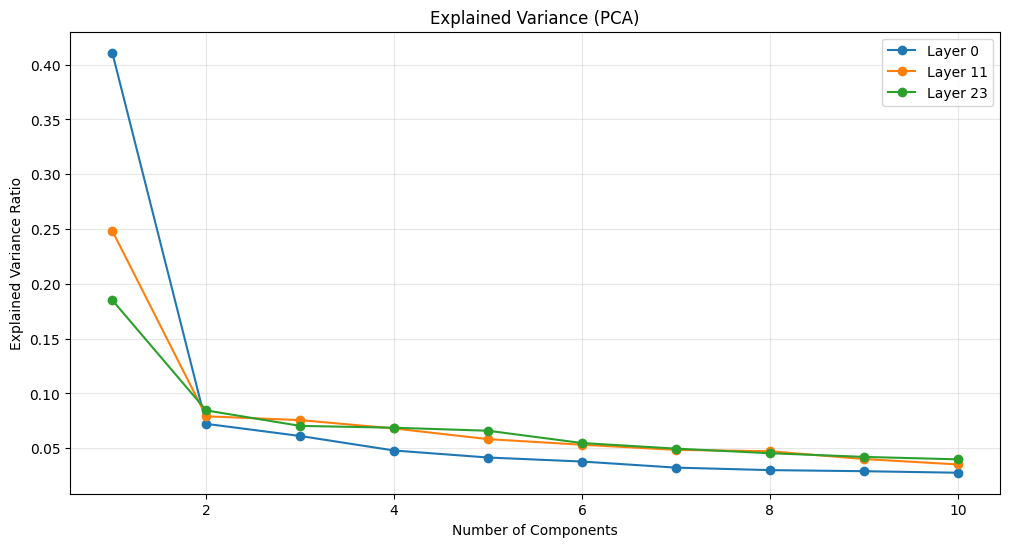

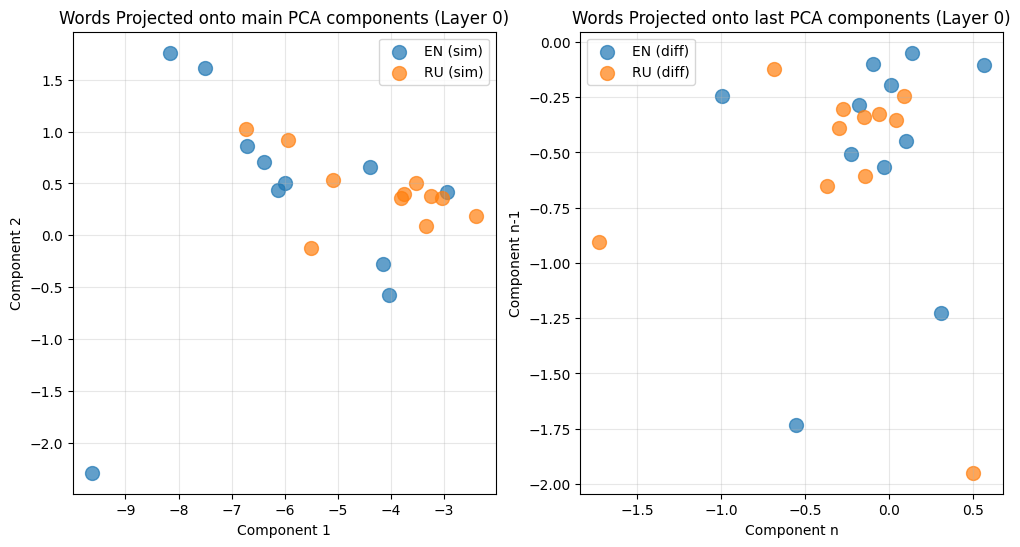

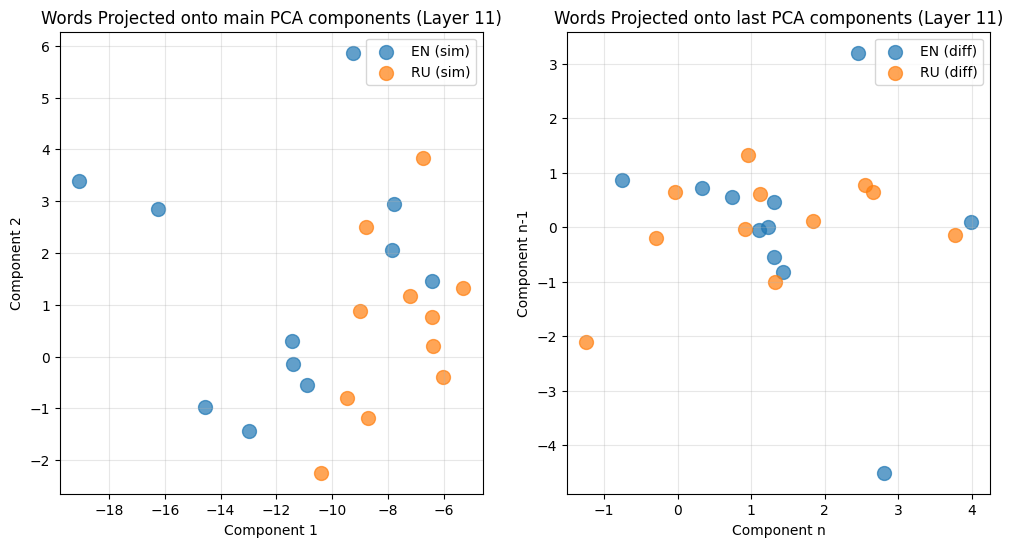

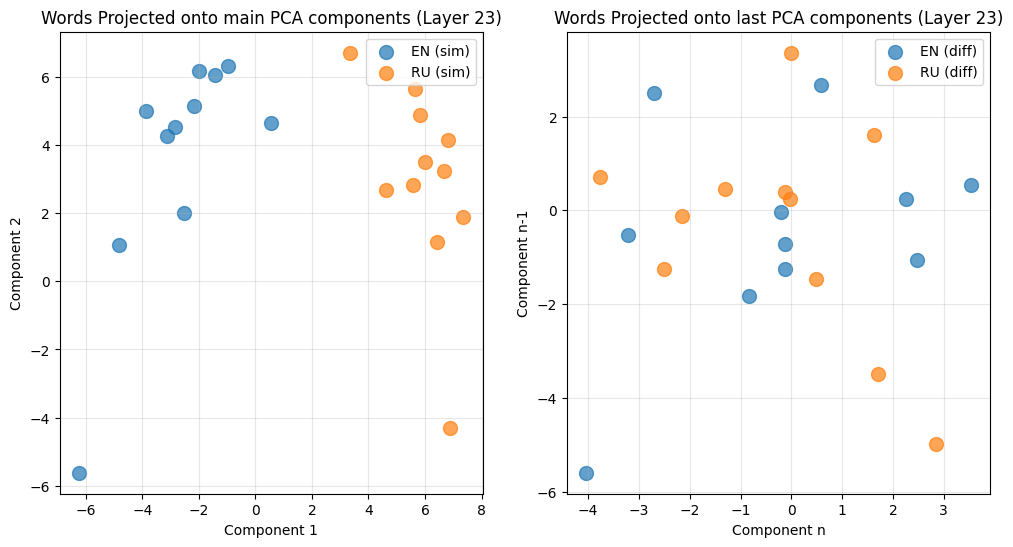

In [3]:
toy_data = [
    {"EN": "Hello", "RU": "Здравствуй"},
    {"EN": "darkness", "RU": "тьма"},
    {"EN": "my", "RU": "мой"},
    {"EN": "old", "RU": "старый"},
    {"EN": "friend", "RU": "друг"},
    {"EN": "I've", "RU": "Я"},
    {"EN": "come", "RU": "пришел"},
    {"EN": "to talk", "RU": "поговорить"},
    {"EN": "with", "RU": "с"},
    {"EN": "you", "RU": "тобой"},
    {"EN": "again", "RU": "снова"},
]

find_lexical_subspace_intersection(model, toy_data)